In [26]:
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import sys
sys.path.append('../')
from utils import parse_baseline_results_folder, parse_results_folder

In [2]:
parse_results_folder('../runs/results')

In [3]:
with open('../runs/processed_results/df_results.pkl', 'rb') as f:
    df_results = pickle.load(f)

df = df_results.loc[(df_results['fm'] == 'GaussianCompressiveSensing') 
                                   & (df_results['model'] == 'iagan_began_cs') 
                                   & (df_results['n_cuts'] == 0)]
df['type'] = 'IAGAN-BEGAN'

In [4]:
def ratio_fn(row):
    image_size = 128
    return row['n_measure'] / (3 * image_size * image_size)

def mse_fn(psnr):
    return 10**(-psnr / 10)

In [5]:
df['undersampling_ratio'] = df.apply(lambda row: ratio_fn(row), axis=1)
df['mse'] = mse_fn(df['psnr'])

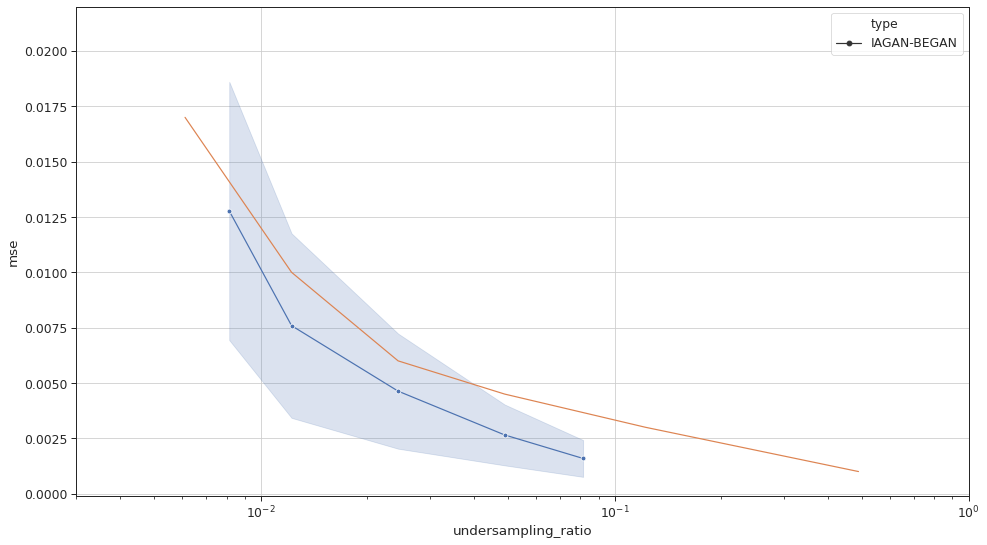

In [29]:
sns.set(rc={'figure.figsize': (16, 9)})
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.4)

plt.figure()
plt.tight_layout()
plt.grid(True)

ax = sns.lineplot(x="undersampling_ratio", y="mse",  ci='sd', markers=True, style='type', data=df,)
ax.set_xscale('log')
ax.set_xlim([0.003, 1])
ax.set_ylim([-0.0001, 0.022])
# plt.savefig(f'./figures/cs_chart.compare_cropped.png', dpi=300, bbox_inches = 'tight')


cr = np.array([300, 600, 1200, 2400, 6000, 12000, 24000])/ (128*128*3)
mse = np.array([0.017, 0.010, 0.006, 0.0045, 0.003, 0.002, 0.001])
ax.plot(cr, mse)
    
plt.show()